### Analyzing 311 cases from NYC

This notebook is 100% based on my classes I took at NYU Center of Urban Science and Progress (CUSP) in 2019.

__This is not my creation.__

__This work was presented by Professor Sobolevsky during his classes.__

This goes along the lines of our recent paper [Wang, L., Qian, C., Kats, P., Kontokosta, C., & Sobolevsky, S. (2017). Structure of 311 service requests as a signature of urban location. PloS one, 12(10), e0186314.]

The purpose of this work is to demonstrate the application of a machine learning techinque (KMEANS) to cluster data into buckets and then plot this clustered data to a geographical (spatial) setting.

1) The first step is to import aggregated 311 data from NYC (civil complaints).
2) The code reshapes (pivot) the data so it can be analyzed by ZIP (rows) vs Complaints (columns)
3) The data goes through the KMEANS code, this codes outputs an array
4) A dictionary maps the result of the clustering to the zip codes
5) The shape of NYC is imported
6) The data with the clusters is mapped to the NYC shapes
7) The map with each cluster color in the correspondent zip area is plotted

There are 2 external files needed for this code to work:
1) Shape file of the NYC neighborhoods (data/NY.shp)
2) Dataset with 311 complaints (aggr311.csv)

In [2]:
import pandas as pd
#UPLOAD SOURCE DATASET
data311 = pd.read_csv( 'data/aggr311.csv' , index_col=0 )
data311.head()

,Zip,Complain,Count
1,NaN,Adopt-A-Basket,5
2,10001,Adopt-A-Basket,1
3,10003,Adopt-A-Basket,1
4,10009,Adopt-A-Basket,1
5,10010,Adopt-A-Basket,1


In [3]:
data311.Zip=pd.to_numeric(data311.Zip,errors='coerce')
data311.head()

,Zip,Complain,Count
1,NaN,Adopt-A-Basket,5
2,10001.0,Adopt-A-Basket,1
3,10003.0,Adopt-A-Basket,1
4,10009.0,Adopt-A-Basket,1
5,10010.0,Adopt-A-Basket,1


In [4]:
## APPLY FILTERS TO REDUCE THE DATASET TO OUR AREA OF INTEREST 
# In this case, only NYC zipcodes (between nrs 1000 and 11500)

data311=data311.loc[(data311.Zip>=10000)&(data311.Zip<11500)] 

In [5]:
## PIVOT THE TABLE TO SHOW THE COMPLAINTS AS COLUMNS
data311=pd.pivot_table(data311,index='Zip',columns='Complain',values='Count',fill_value=0)
data311

Complain,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,BEST/Site Safety,Beach/Pool/Sauna Complaint,Bike Rack Condition,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
Zip,,,,,,,,,,,,,,,,,,,,,
10000.0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,8,8,0,0,0,0,0
10001.0,0,1,90,0,0,1,20,36,1,1,...,3,0,2,51,5,5,2,366,0,0
10002.0,15,0,80,0,0,21,18,20,2,6,...,5,1,4,27,14,10,7,324,0,0
10003.0,15,1,143,0,2,44,24,13,2,2,...,7,11,2,54,25,12,5,318,0,0
10004.0,0,0,15,0,0,4,3,1,0,1,...,1,1,0,16,21,0,0,37,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11432.0,38,1,9,0,0,4,11,6,1,0,...,1,3,29,15,2,22,6,322,0,0
11433.0,30,0,14,0,1,6,6,0,0,0,...,0,2,63,2,3,43,11,271,0,0
11434.0,31,0,18,0,1,8,12,0,1,0,...,1,0,39,4,3,27,12,427,0,0


In [6]:
## DATASET IS READY TO BE MERGED WITH SHAPE FILE

data311.head()

Complain,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,BEST/Site Safety,Beach/Pool/Sauna Complaint,Bike Rack Condition,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
Zip,,,,,,,,,,,,,,,,,,,,,
10000.0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,8,8,0,0,0,0,0
10001.0,0,1,90,0,0,1,20,36,1,1,...,3,0,2,51,5,5,2,366,0,0
10002.0,15,0,80,0,0,21,18,20,2,6,...,5,1,4,27,14,10,7,324,0,0
10003.0,15,1,143,0,2,44,24,13,2,2,...,7,11,2,54,25,12,5,318,0,0
10004.0,0,0,15,0,0,4,3,1,0,1,...,1,1,0,16,21,0,0,37,0,0


In [7]:
## DATA CLEANSING AND SUMMARY 

Total311=data311.sum(axis=1) #total 311 activity per zip code
data311=data311.div(data311.sum(axis=1), axis=0) #normalize activity of various cathegories within zip code by total
data311=data311.loc[Total311>100] #keep only those zip codes having sufficient activity

In [8]:
data311.head()

Complain,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,BEST/Site Safety,Beach/Pool/Sauna Complaint,Bike Rack Condition,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
Zip,,,,,,,,,,,,,,,,,,,,,
10000.0,0.000000,0.000000,0.008772,0.0,0.000000,0.008772,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.070175,0.070175,0.000000,0.000000,0.000000,0.0,0.0
10001.0,0.000000,0.000146,0.013179,0.0,0.000000,0.000146,0.002929,0.005272,0.000146,0.000146,...,0.000439,0.000000,0.000293,0.007468,0.000732,0.000732,0.000293,0.053595,0.0,0.0
10002.0,0.001330,0.000000,0.007095,0.0,0.000000,0.001862,0.001596,0.001774,0.000177,0.000532,...,0.000443,0.000089,0.000355,0.002394,0.001242,0.000887,0.000621,0.028734,0.0,0.0
10003.0,0.001331,0.000089,0.012690,0.0,0.000177,0.003905,0.002130,0.001154,0.000177,0.000177,...,0.000621,0.000976,0.000177,0.004792,0.002218,0.001065,0.000444,0.028219,0.0,0.0
10004.0,0.000000,0.000000,0.009740,0.0,0.000000,0.002597,0.001948,0.000649,0.000000,0.000649,...,0.000649,0.000649,0.000000,0.010390,0.013636,0.000000,0.000000,0.024026,0.0,0.0


In [9]:
#APPLY KMEANS METHOD TO CLUSTER THE DATA BASED ON THE COMPLAINTS 
# LIMITING TO 3 CLUSTERS
from sklearn.cluster import KMeans

rr=KMeans(n_clusters=3, n_init=10, random_state=0).fit(data311)

In [10]:
#max(rr.labels_)

In [11]:
## LOOK THE ARRAY
rr.labels_[:10]

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2], dtype=int32)

In [12]:
#MAP ZIP CODES TO CLUSTERS AND CREATE A DICTIONARY
clust={data311.index[i]:rr.labels_[i] for i in range(len(rr.labels_))}

In [13]:
#CREATE A DATAFRAME WITH ZIPCODES AND CLUSTERS
res=pd.DataFrame({'zipcode':data311.index, 'label':rr.labels_})

In [14]:
import geopandas as gpd

In [15]:
#read shapefiles of NYC zip codes
NYCzip=gpd.read_file('data/NY.shp')

In [16]:
# GEOPANDAS DISPLAYS THE SPATIAL DATA IN A DATAFRAME FORMAT
NYCzip.head() 

,zipcode,geometry
0,11372.0,"POLYGON Z ((-73.86942 40.74916 0.00000, -73.89..."
1,11004.0,"POLYGON Z ((-73.71068 40.75004 0.00000, -73.70..."
2,11040.0,"POLYGON Z ((-73.70098 40.73890 0.00000, -73.70..."
3,11426.0,"POLYGON Z ((-73.72270 40.75373 0.00000, -73.72..."
4,11365.0,"POLYGON Z ((-73.81089 40.72717 0.00000, -73.81..."


<AxesSubplot:>

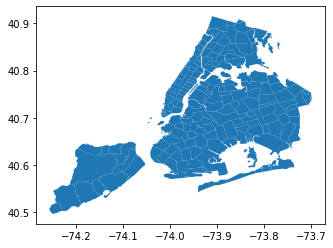

In [17]:
#PLOT THE MAP
NYCzip.plot()

In [18]:
#MAP CLUSTER VALUES TO THE GEOPANDAS DATAFRAME
NYCzip['cluster']=NYCzip.zipcode.map(clust)
NYCzip.dropna(inplace=True)

In [19]:
NYCzip.head()

,zipcode,geometry,cluster
0,11372.0,"POLYGON Z ((-73.86942 40.74916 0.00000, -73.89...",0.0
1,11004.0,"POLYGON Z ((-73.71068 40.75004 0.00000, -73.70...",0.0
2,11040.0,"POLYGON Z ((-73.70098 40.73890 0.00000, -73.70...",0.0
3,11426.0,"POLYGON Z ((-73.72270 40.75373 0.00000, -73.72...",0.0
4,11365.0,"POLYGON Z ((-73.81089 40.72717 0.00000, -73.81...",0.0


/Users/guilherme/Library/CloudStorage/OneDrive-Personal/DataAnalytics/Python/maps/.geopandas/lib/python3.9/site-packages/geopandas/plotting.py:637: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(


<AxesSubplot:>

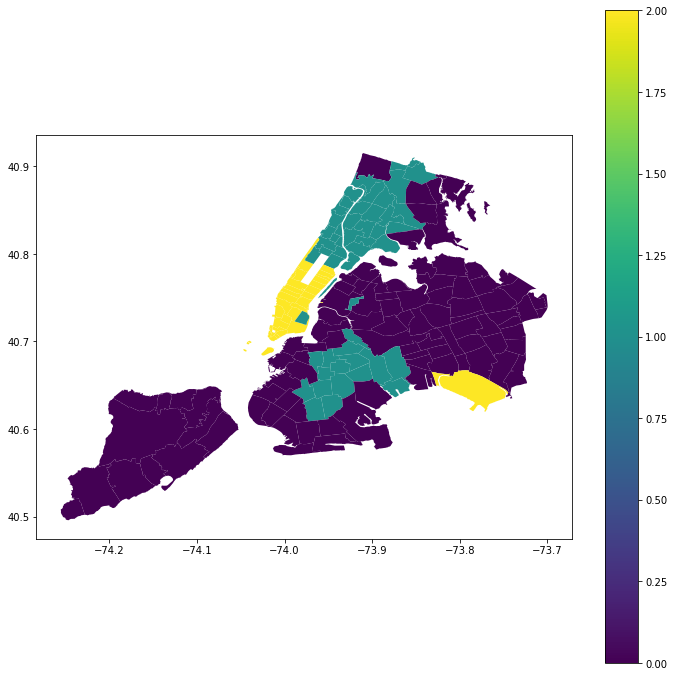

In [21]:
from matplotlib.pylab import plt
f, ax = plt.subplots(1, figsize=(12, 12))
NYCzip.plot(axes=ax, column='cluster', legend=True)